# <center>EE4708: Data Analytics Laboratory </center>
# <center>Assignment 6: Support Vector Machine </center>
## <center>Gautham Govind A, EE19B022 </center>

## Importing necessary libraries

In [69]:
import numpy as np
import pandas as pd
import warnings

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.metrics import precision_score,recall_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams.update({'font.size': 17})
plt.rcParams['figure.figsize'] = (10, 7)
warnings.filterwarnings('ignore')

## Loading the dataset

In [4]:
df = pd.read_excel('pulsar_data_train.xlsx')

In [5]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0


In [6]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 881.0 KB


In [8]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


- We have null values. We process them as we do exploratory analysis.
- All the features are continuous. So KDE plots will be of use.

## Exploratory Data Analysis

We first look at the distribution of target class:

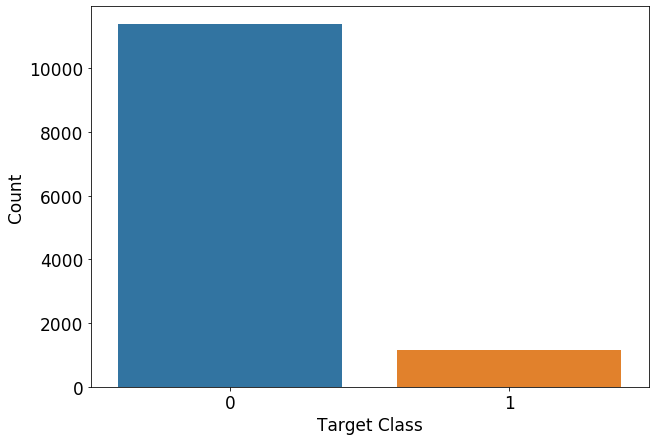

In [9]:
sns.countplot(x = 'target_class', data = df)
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.savefig('Figures/target_dist.png', bbox_inches = 'tight')

In [10]:
print("Percentage of data belonging to class 1 (is a Pulsar):", np.sum(df['target_class'])*100/len(df['target_class']))

Percentage of data belonging to class 1 (is a Pulsar): 9.20338441890166


Clearly, we have a severe class imbalance, with only 9.20% of data beloning to target class 1. We will have to account for this during model building.

Note than in all further KDE plots, we normalize over the target classes independently so as to make the comparison easier.

In [11]:
target_labels = ['Pulsar', 'Not Pulsar']

#### Mean of the integrated profile

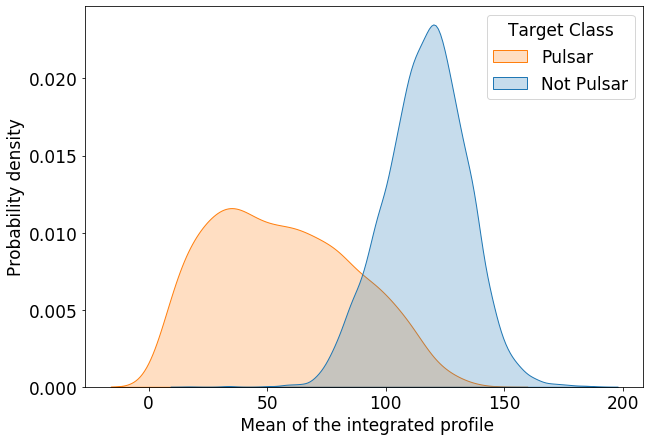

In [12]:
ax = sns.kdeplot(x = ' Mean of the integrated profile', hue = 'target_class', data = df, shade  = True, common_norm = False)
ax.set_ylabel('Probability density')
ax.legend(target_labels, title = 'Target Class')
plt.savefig('Figures/mip_b.png', bbox_inches = 'tight')

- Stars which are not pulsars tend to have a higher mean of integrated profile.
- The means of integrated profiles of stars which are pulsars are spread more as comapred to non-pulsars. 

####  Standard deviation of the integrated profile

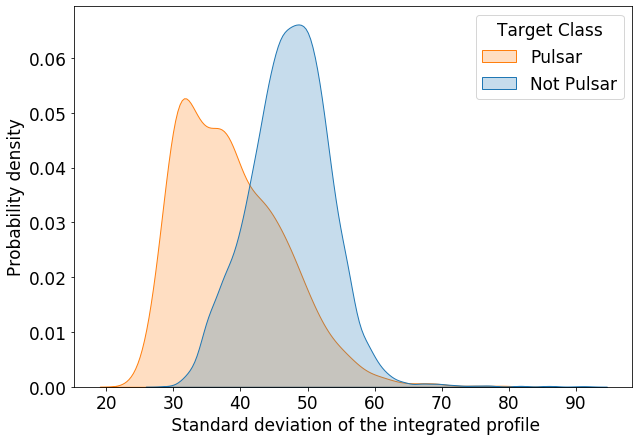

In [13]:
ax = sns.kdeplot(x = ' Standard deviation of the integrated profile', hue = 'target_class', data = df, shade  = True, common_norm = False)
ax.set_ylabel('Probability density')
ax.legend(target_labels, title = 'Target Class')
plt.savefig('Figures/stdip_b.png', bbox_inches = 'tight')

- Stars which are not pulsars tend to have a higher stanadard deviation of integrated profile.

#### Excess kurtosis of the integrated profile

This feature has missing values. We first plot the non-null values:

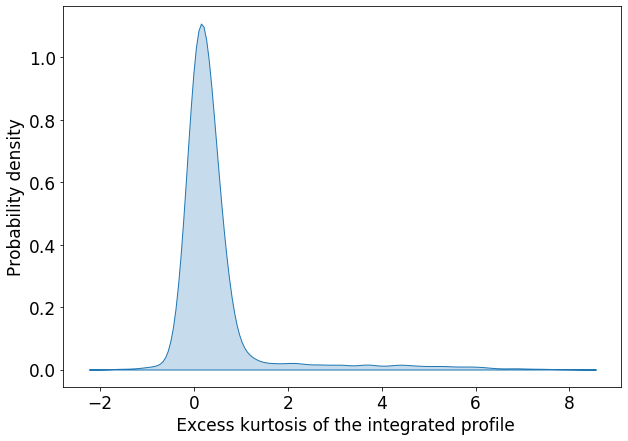

In [14]:
ax = sns.kdeplot(x = ' Excess kurtosis of the integrated profile', data = df, shade  = True, common_norm = False)
ax.set_ylabel('Probability density')
#ax.legend(target_labels, title = 'Target Class')
plt.savefig('Figures/kip_bn.png', bbox_inches = 'tight')

Clearly the distribution resembles a Gaussian, with low standard deviation. Tails are rather thin. So we perform mean imputation:

In [15]:
kut_imputer = SimpleImputer()
kut_imputer.fit(np.array(df[' Excess kurtosis of the integrated profile']).reshape(-1, 1))
df[' Excess kurtosis of the integrated profile'] = kut_imputer.transform(np.array(df[' Excess kurtosis of the integrated profile']).reshape(-1, 1))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     12528 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 881.0 KB


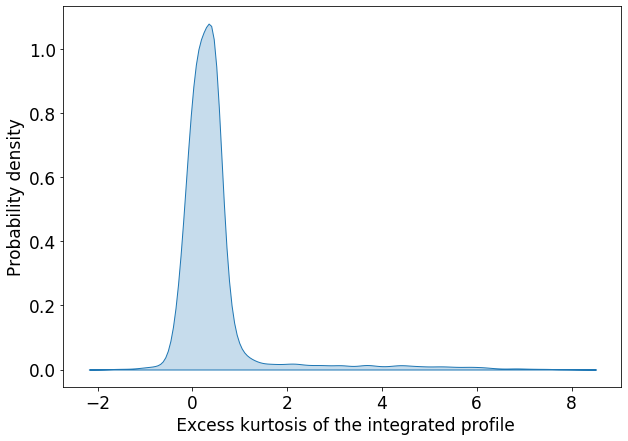

In [17]:
ax = sns.kdeplot(x = ' Excess kurtosis of the integrated profile', data = df, shade  = True, common_norm = False)
ax.set_ylabel('Probability density')
#ax.legend(target_labels, title = 'Target Class')
plt.savefig('Figures/ktip_an.png', bbox_inches = 'tight')

Distribution remains largely identical.

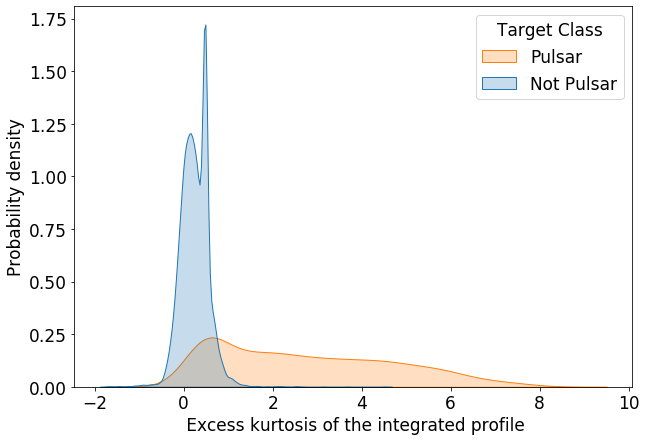

In [18]:
ax = sns.kdeplot(x = ' Excess kurtosis of the integrated profile', hue = 'target_class',data = df, shade  = True, common_norm = False)
ax.set_ylabel('Probability density')
ax.legend(target_labels, title = 'Target Class')
plt.savefig('Figures/ktip_b.png', bbox_inches = 'tight')

#### Skewness of the integrated profile

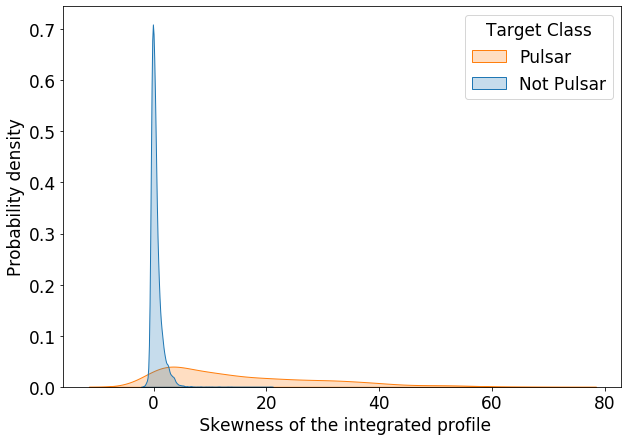

In [19]:
ax = sns.kdeplot(x = ' Skewness of the integrated profile', hue = 'target_class', data = df, shade  = True, common_norm = False)
ax.set_ylabel('Probability density')
ax.legend(target_labels, title = 'Target Class')
plt.savefig('Figures/skip_b.png', bbox_inches = 'tight')

- Skewness of the integrated profile for the pulsar class is more spread out.

#### Mean of the DM-SNR curve

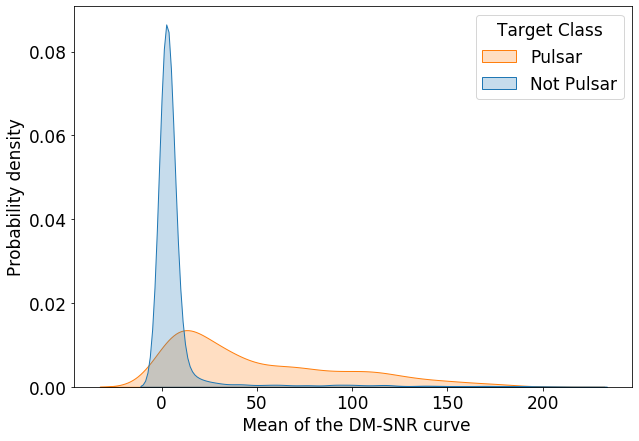

In [20]:
ax = sns.kdeplot(x = ' Mean of the DM-SNR curve', hue = 'target_class', data = df, shade  = True, common_norm = False)
ax.set_ylabel('Probability density')
ax.legend(target_labels, title = 'Target Class')
plt.savefig('Figures/mds_b.png', bbox_inches = 'tight')

- Stars which are pulsars tend to have a higher mean of DM-SNR curve.
- The means of DM-SNR curves of stars which are pulsars are spread more as comapred to non-pulsars. 

#### Standard deviation of the DM-SNR curve

This feature has missing values. We first plot the non-null values:

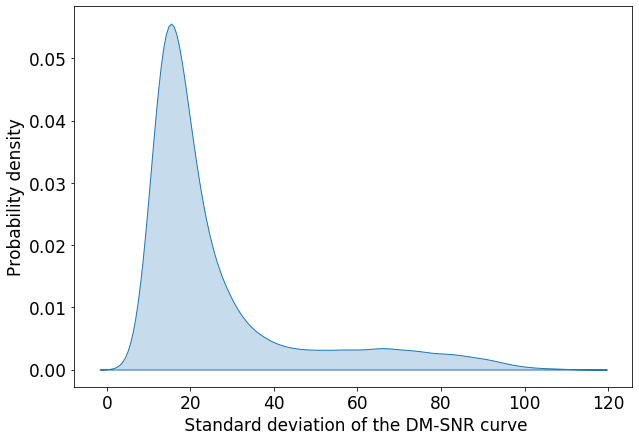

In [21]:
ax = sns.kdeplot(x = ' Standard deviation of the DM-SNR curve', data = df, shade  = True, common_norm = False)
ax.set_ylabel('Probability density')
#ax.legend(target_labels, title = 'Target Class')
plt.savefig('Figures/stdds_bn.png', bbox_inches = 'tight')

Since we have a pretty significant tail, we use median for imputing:

In [30]:
std_imputer = SimpleImputer(strategy = 'median')
std_imputer.fit(np.array(df[' Standard deviation of the DM-SNR curve']).reshape(-1, 1))
df[' Standard deviation of the DM-SNR curve'] = std_imputer.transform(np.array(df[' Standard deviation of the DM-SNR curve']).reshape(-1, 1))

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     12528 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        12528 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  12528 non-null  float64
 8   target_class                                   12528 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 881.0 KB


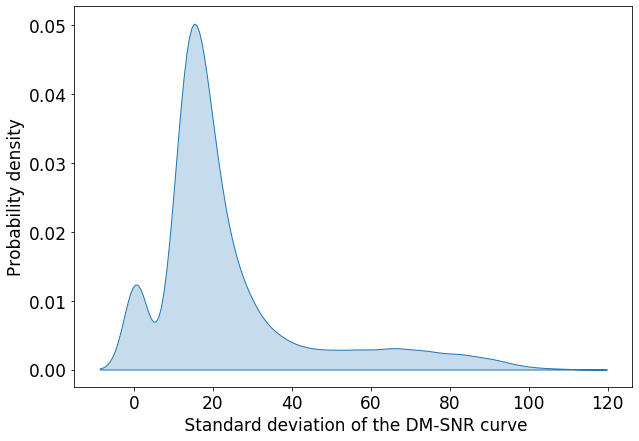

In [32]:
ax = sns.kdeplot(x = ' Standard deviation of the DM-SNR curve', data = df, shade  = True, common_norm = False)
ax.set_ylabel('Probability density')
#ax.legend(target_labels, title = 'Target Class')
plt.savefig('Figures/stdds_an.png', bbox_inches = 'tight')

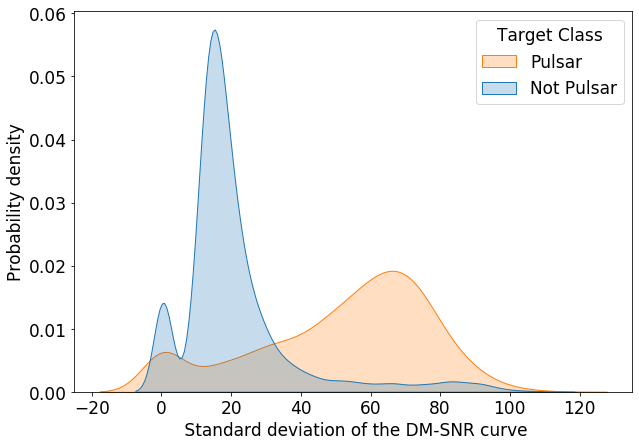

In [33]:
ax = sns.kdeplot(x = ' Standard deviation of the DM-SNR curve', hue = 'target_class',data = df, shade  = True, common_norm = False)
ax.set_ylabel('Probability density')
ax.legend(target_labels, title = 'Target Class')
plt.savefig('Figures/stdds_b.png', bbox_inches = 'tight')

- Stars which are pulsars tend to have a higher stanadard deviation of DM-SNR curve.

#### Excess kurtosis of the DM-SNR curve

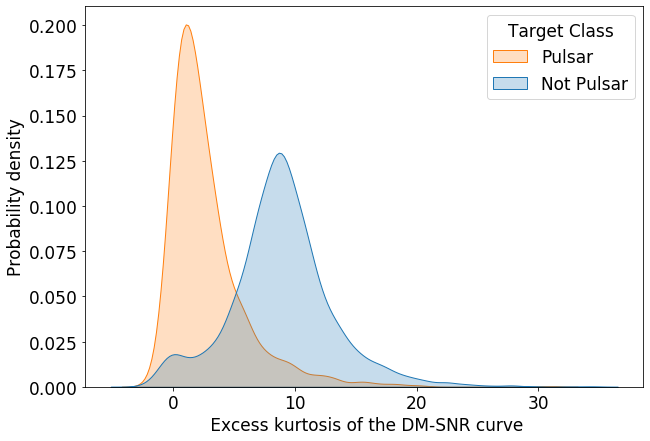

In [26]:
ax = sns.kdeplot(x = ' Excess kurtosis of the DM-SNR curve', hue = 'target_class',data = df, shade  = True, common_norm = False)
ax.set_ylabel('Probability density')
ax.legend(target_labels, title = 'Target Class')
plt.savefig('Figures/ktds_b.png', bbox_inches = 'tight')

Higher excess kurtosis of DM-SNR curve for non-pulsars.

#### Skewness of the DM-SNR curve

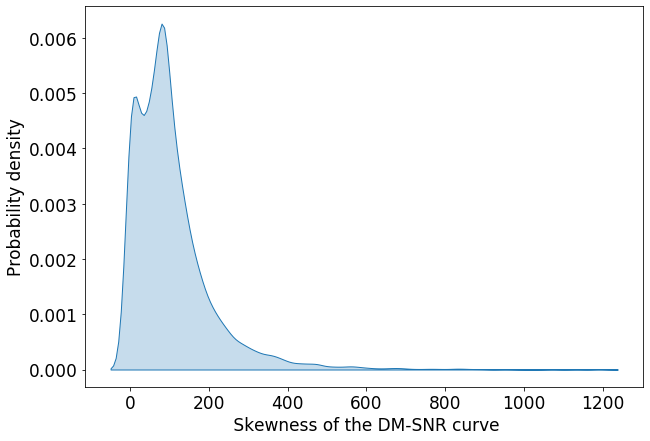

In [37]:
ax = sns.kdeplot(x = ' Skewness of the DM-SNR curve', data = df, shade  = True, common_norm = False)
ax.set_ylabel('Probability density')
#ax.legend(target_labels, title = 'Target Class')
plt.savefig('Figures/skds_bn.png', bbox_inches = 'tight')

Since we have a pretty significant tail, we use median for imputing:

In [28]:
sk_imputer = SimpleImputer(strategy = 'median')
sk_imputer.fit(np.array(df[' Skewness of the DM-SNR curve']).reshape(-1, 1))
df[' Skewness of the DM-SNR curve'] = sk_imputer.transform(np.array(df[' Skewness of the DM-SNR curve']).reshape(-1, 1))

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     12528 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        12528 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  12528 non-null  float64
 8   target_class                                   12528 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 881.0 KB


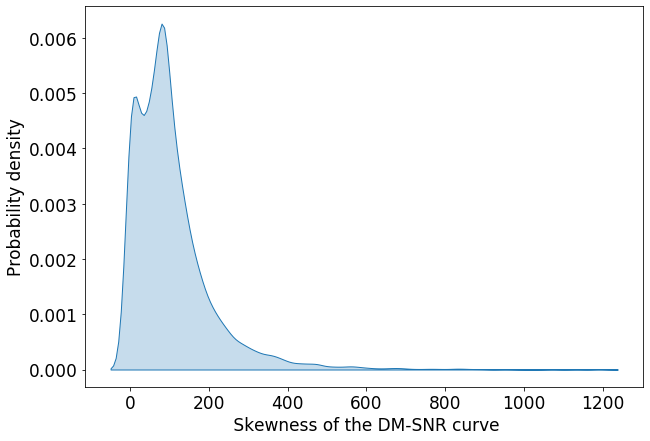

In [35]:
ax = sns.kdeplot(x = ' Skewness of the DM-SNR curve', data = df, shade  = True, common_norm = False)
ax.set_ylabel('Probability density')
#ax.legend(target_labels, title = 'Target Class')
plt.savefig('Figures/skds_an.png', bbox_inches = 'tight')

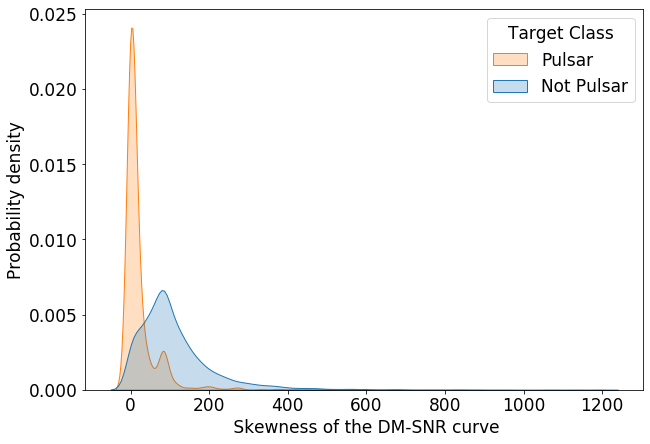

In [36]:
ax = sns.kdeplot(x = ' Skewness of the DM-SNR curve', hue = 'target_class',data = df, shade  = True, common_norm = False)
ax.set_ylabel('Probability density')
ax.legend(target_labels, title = 'Target Class')
plt.savefig('Figures/skds_b.png', bbox_inches = 'tight')

Higher skewness of DM-SNR curve for non-pulsars.

## Training the model

For SVM, it is necessary to have same scaling for input features:

In [46]:
list(df.columns)[:-1]

[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Skewness of the DM-SNR curve']

In [44]:
scaler = StandardScaler()

X = df.drop('target_class', axis=1)
y = df['target_class']

X = scaler.fit_transform(X)

df[list(df.columns)[:-1]] = X

Next, we perform splitting. The dataset is split into training and validation sets. Stratified sampling is done to preserve the class ratio.

In [49]:
X = df.drop('target_class', axis=1)
y = df['target_class']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3,
                                              random_state = 42, stratify=y)

In [50]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

In [52]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(8769, 8) (3759, 8) (8769,) (3759,)


In [53]:
sum(y_train==0)/len(y_train)*100

90.79712624016422

In [54]:
sum(y_val==0)/len(y_val)*100

90.7954243149774

Finally, we grid search on the ideal set of parameters for the SVM model:

In [56]:
clf = SVC(class_weight='balanced')

param_grid = [{'C':np.logspace(-3, 5, base = 2, num = 10),
               'kernel':['linear']},
              {'C':np.logspace(-3, 5, base = 2, num = 10),
               'gamma':np.logspace(-3, 5, base = 2, num = 10),
               'kernel':['rbf']}]

In [57]:
grid = GridSearchCV(clf, param_grid, cv=5, n_jobs = -1, verbose = 2, scoring='f1')

In [58]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 110 candidates, totalling 550 fits


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid=[{'C': array([ 0.125     ,  0.23146868,  0.42862199,  0.79370053,  1.46973449,
        2.72158   ,  5.0396842 ,  9.33223232, 17.28095582, 32.        ]),
                          'kernel': ['linear']},
                         {'C': array([ 0.125     ,  0.23146868,  0.42862199,  0.79370053,  1.46973449,
        2.72158   ,  5.0396842 ,  9.33223232, 17.28095582, 32.        ]),
                          'gamma': array([ 0.125     ,  0.23146868,  0.42862199,  0.79370053,  1.46973449,
        2.72158   ,  5.0396842 ,  9.33223232, 17.28095582, 32.        ]),
                          'kernel': ['rbf']}],
             scoring='f1', verbose=2)

In [59]:
grid.best_params_

{'C': 5.039684199579492, 'gamma': 0.2314686780718226, 'kernel': 'rbf'}

In [60]:
clf_best = grid.best_estimator_

Evaluating accuracy on train set:

In [61]:
clf_best.score(X_train,y_train)

0.976052001368457

In [62]:
clf_best.n_support_

array([1090,  224], dtype=int32)

In [63]:
clf_best.support_vectors_.shape

(1314, 8)

## Model Evaluation

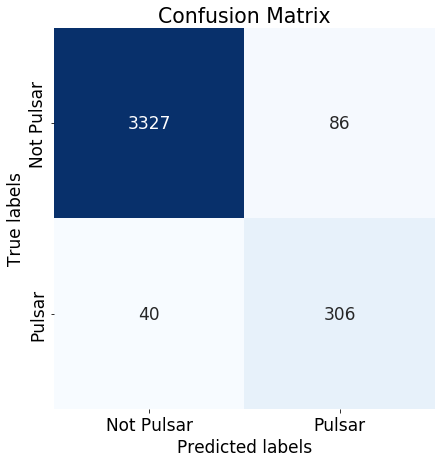

In [65]:
cm = confusion_matrix(y_val,clf_best.predict(X_val))

ax = plt.subplot()
sns.heatmap(cm, square = True, annot = True, cbar = False, cmap = 'Blues', fmt='g',
           xticklabels=['Not Pulsar','Pulsar'], yticklabels=['Not Pulsar','Pulsar'], ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
plt.savefig('Figures/conf_mat.png', bbox_inches = 'tight')

In [67]:
y_pred = clf_best.predict(X_val)

In [68]:
print("Accuracy :", accuracy_score(y_val, y_pred))
print("Precision :", precision_score(y_val, y_pred))
print("Recall :", recall_score(y_val, y_pred))
print("F1 Score :", f1_score(y_val, y_pred))

Accuracy : 0.9664804469273743
Precision : 0.7806122448979592
Recall : 0.884393063583815
F1 Score : 0.8292682926829269


In [70]:
y_scores = clf_best.decision_function(X_val)
fpr, tpr, thresholds = roc_curve(y_val, y_scores)

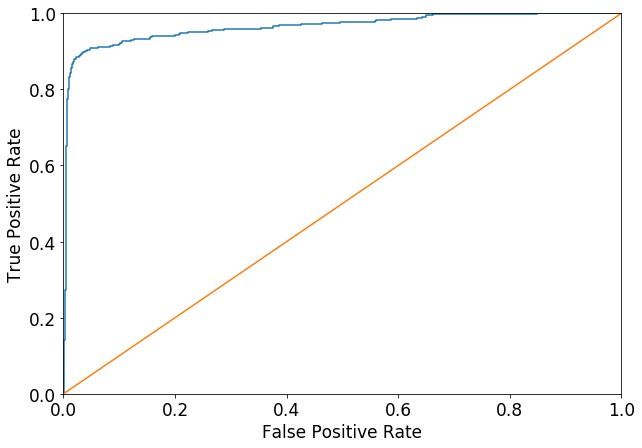

In [83]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('Figures/Rocauccurve', bbox_inches = 'tight')

In [72]:
roc_auc_score(y_val, y_scores)

0.9645168337993628

## Generating predictions for test data

In [73]:
df_test = pd.read_excel('pulsar_data_test.xlsx')

In [74]:
df_test.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


In [77]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                5370 non-null   float64
 1    Standard deviation of the integrated profile  5370 non-null   float64
 2    Excess kurtosis of the integrated profile     4603 non-null   float64
 3    Skewness of the integrated profile            5370 non-null   float64
 4    Mean of the DM-SNR curve                      5370 non-null   float64
 5    Standard deviation of the DM-SNR curve        4846 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           5370 non-null   float64
 7    Skewness of the DM-SNR curve                  5126 non-null   float64
 8   target_class                                   0 non-null      float64
dtypes: float64(9)
memory usage: 377.7 KB


In [76]:
X_test = df_test.drop('target_class', axis=1)

In [78]:
X_test[' Excess kurtosis of the integrated profile'] = kut_imputer.transform(np.array(X_test[' Excess kurtosis of the integrated profile']).reshape(-1, 1))
X_test[' Standard deviation of the DM-SNR curve'] = std_imputer.transform(np.array(X_test[' Standard deviation of the DM-SNR curve']).reshape(-1, 1))
X_test[' Skewness of the DM-SNR curve'] = sk_imputer.transform(np.array(X_test[' Skewness of the DM-SNR curve']).reshape(-1, 1))

In [79]:
X_test = scaler.transform(X_test)

In [80]:
y_pred = clf_best.predict(X_test)

In [81]:
df_test.target = y_pred

In [82]:
df_test.to_csv("submission.csv", index = False)